# Prototype
Martina Buck | 4.11.2020

## Goals
1.give a first impression of what the game could look like

2.demonstrate a possible game-mechanism

(All text and game mechanisms are just placeholders until something better comes along.)


In [1]:


# import libraries
import numpy as np
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import rasterio

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

#set directory one level over notebook
import os; os.chdir("..")




In [2]:
# import own functions 
from game import * 
from constants import *

## Instructions

Landscape is an ever changing thing. But those changes don't always happen without conflicts. In the following game the players will be part of a group of stakeholders. 

They will take the role as foresters, farmers or business representatives/cartel. To start a new game and give out all the roles, fill in the numbers of players (3 to 6):

In [3]:
# database that still needs to be created should be cleared in this step for new players.
number_of_players = 6
roles(number_of_players)

There are 6 roles for each player, Farmer 1 and 2, Forester 1 and 2 and Business representatives 1 and 2. Please distribute each role among yourselves


Now have a look at playing field.

You are finding yourselves in Scottland in the area of Galloway and Southern Ayrshire Biosphere. The government decided that more forest area in Scottland is needed to help to combate Climate Change. At the same time the people of Scottland need steady jobs with a decent pay. You find yourself having either Farmland, Forest or a business with money and a demand for agricultural and timber products depending on your choosen role. 

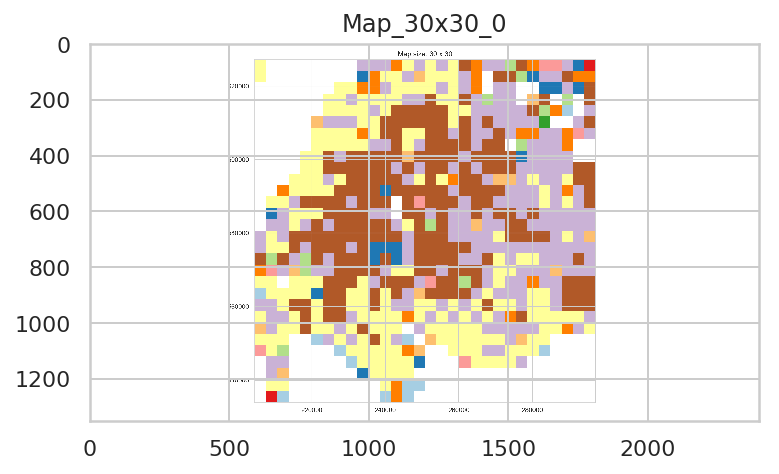

In [4]:
game()

To play the game, every player fills out his decisions on what to do with his land on the google sheet for his role (maybe we could put here a link but then everyone has acces to everyones decisions...):

The map changes after each decision. To call the map after each round call the function game() with current round as parameter. (i.e.: after the first round call game(1))

In [5]:
# insert the current round in game(current_round)
game(1)
# not done yet. doesn't change or save the map yet.

FileNotFoundError: [Errno 2] No such file or directory: 'NFI_map_30_30_1.png'

After playing a few rounds, let's evaluate your current process so far:

In [ ]:
# things like employment, GDP, agricultural area, forest area, ...